# Bayesian analysis

Write a Monte Carlo simulation to answer the question below.

You’re about to board a train from London to Newcastle. You want to know if it’s raining, so you call your three friends who live in Newcastle. Each friend has a 2/3 chance of telling you the truth and a 1/3 chance of telling you a lie. All three friends tell you that, yes, it’s raining in Newcastle. What is the probability that it is, in fact, raining in Newcastle?

First of all, we need to understand that this analysis could be solved using a closed-form from a frequentist point of view.

$$ \text{Probability of rain} = 1 - \text{Probability of not rain}$$
$$ = 1 - \text{Probability of all lying}$$
$$ = 1 - (1/3)^{3}$$
$$ \approx 96\%$$

But with this approach, we will forgetting the fact that we need to obtain the probability of raining, given some information, in this case that all 3 friends said yes.

First, let's take a look the case when only 1 friend, and then we could generalize:

**Note: In this case we are going to assume $\text{P(Raining = True) = 0.5}$, since is the value of the prior it is not given.**

### Case \#1: Just 1 friend

Let´s take a look of the next image

<img src="../utils/venns_diagram.png" 
     align="center"
     width="450" />

In this diagram, we can see that we have 2 events:

- Raining, whose probability space is:
     - Raining
     - Not raining

- Answer to this question, is it raining?, whose probability space is:
     - Yes
     - No

At the end, because we are given the probailities of telling the truth or a lie, we can see create combinations of both previous events:
- Raining and Yes        = Truth
- Raining and No         = Lie
- Not raining and Yes    = Lie
- Not raining and No     = Truth

This time, we are interest on calculating $\text{P(rain = 1 | Question = Yes)} = \text{P(R = 1 | Q = 1)}$, so:

$$\text{P(R = 1 | Q = 1)} = \dfrac{\text{P( Q = 1 | R = 1) * P(R = 1)}}{\text{P(Q = 1)}} $$

and we got this:

- $\text{P( Q = 1 | R = 1)} = \text{P(Telling the truth)} = \dfrac{2}{3}$
- $\text{P(Raining = True) = 0.5}$
- $\text{P(Q = 1)}$ that will be estimated like this

The friend can say "yes" in both raining cases, so in this case the probability is the result of 2 probabilities

$$\text{P(Q = 1)} = \text{P(Q = 1} \cap \text{R = 1)} + \text{P(Q = 1} \cap \text{R = 0)} $$
$$=\text{P(Truth} \cap \text{R = 1)} + \text{P(Lie} \cap \text{R = 0)} $$
$$=\text{P(Truth)} * \text{P(R = 1)} + \text{P(Lie)} * \text{P(R = 0)} $$
$$=\text{P(Truth)} * \text{P(R = 1)} + \text{P(Lie)} * \text{(1 - P(R = 1))} $$
$$=\dfrac{2}{3} * 0.5 + \dfrac{1}{3} * \text{(1 - 0.5)} $$
$$= 0.5$$

So, finally we got:

$$\text{P(R = 1 | Q = 1)} = \dfrac{\text{P( Q = 1 | R = 1) * P(R = 1)}}{\text{P(Q = 1)}} = \dfrac{\dfrac{2}{3}* 0.5}{0.5} = \dfrac{2}{3}$$



### Case \#2: Generalization n friends

In this case, we got $n$ friends, so we got $n$ yes, obtaining this:

$$\text{P(R = 1 | Q = 1')} = \dfrac{\text{P( Q = 1'| R = 1) * P(R = 1)}}{\text{P(Q = 1')}} $$

where $1'$ is a $NX1$ vector of ones.

With that in mind, we obtain:

- $\text{P(Q = 1' | R = 1 )}  = \text{P(N Telling the truth and independent)} = \prod_{i = 1}^{N} P(Truth) = {\left( \dfrac{2}{3} \right)}^{n}$
- $\text{P(Raining = True) = 0.5}$
- $\text{P(Q = 1)}$ that will be estimated like this

$$\text{P(Q = 1')} = \text{P(Q = 1'} \cap \text{R = 1)} + \text{P(Q = 1'} \cap \text{R = 0)} $$
$$=\text{P(N Truth} \cap \text{R = 1)} + \text{P(N Lie} \cap \text{R = 0)} $$
$$=\text{P(N Truth)} * \text{P(R = 1)} + \text{P(N Lie)} * \text{P(R = 0)} $$
$$=\text{P(N Truth)} * \text{P(R = 1)} + \text{P(N Lie)} * \text{(1 - P(R = 1))} $$
$$={\left( \dfrac{2}{3} \right)}^{n} * 0.5 + {\left( \dfrac{1}{3} \right)}^{n} * \text{(1 - 0.5)} $$

So finally, we got:

$$\text{P(R = 1 | Q = 1')} = \dfrac{\text{P( Q = 1'| R = 1) * P(R = 1)}}{\text{P(Q = 1')}} = \dfrac{ {\left( \dfrac{2}{3} \right)}^{n} * 0.5}{ {\left( \dfrac{2}{3} \right)}^{n} * 0.5 + {\left( \dfrac{1}{3} \right)}^{n} * \text{(1 - 0.5)} } $$

### Case \#3: Just 3 friends

With that in mind, the probability that we are looking takes this form:

$$\text{P(R = 1 | Q = 1')} = \dfrac{\text{P( Q = 1'| R = 1) * P(R = 1)}}{\text{P(Q = 1')}} = \dfrac{ {\left( \dfrac{2}{3} \right)}^{3} * 0.5}{ {\left( \dfrac{2}{3} \right)}^{3} * 0.5 + {\left( \dfrac{1}{3} \right)}^{3} * \text{(1 - 0.5)} } = \dfrac{8}{9} \approx 88.9\%$$

# Montecarlo simulation: 3 friends

For this exercise, we need to define some items to simulate this process.

- The distribution of raining will be modeled as a U[0,1]
- The distribution of somebody telling the truth or a lie will be modeled as a U[0,1]
- Because it is a montecarlo simulation, we are more interest about a distribution of the outcome more than a single point, because of that we will repite the simulation 1000 times (reps parameter), and each time will performed 10000 simulations.
- This approach will solved this problem from a frequentist point of view using this algorithm
     - Because we have the condition that all friends say "yes" they could be all telling the truth or a lie, we are going to model that and see each simulation how many times all of them say the truth (times_rained_and_say_3_yes) or a lie (times_no_rained_and_say_3_yes).
     - Then, we are going to model if there is raining or not, and only if we got a raining and all of then are telling the truth/a lie, this counter times_rained_and_say_3_yes/times_no_rained_and_say_3_yes will increase.
     - Given that, we can compute this probability following this calculation:
     
     $$\text{P(R = 1 | Q = 1')} = \dfrac{\text{Favorable Cases}}{\text{Possible Cases}} = \dfrac{\text{times rained and say 3 yes}}{\text{times rained and say 3 yes + times no rained and say 3 yes}}$$

In [12]:
import numpy as np
import pandas as pd
# Inputs

# Number of repetitions
reps = 1000

# Number of simulations
sims = 10000

# Prbability of raining
prob_rain = 0.50

# Probability of telling the truth
probTellingTruth = 2/3

numeratorArray = np.zeros((reps))
denominatorArray = np.zeros((reps))

# Loop the runs the repetition
for rep in range(reps):
    # Counter variables to save the outcome
    times_rained_and_say_3_yes = 0
    times_no_rained_and_say_3_yes = 0

    # Loop that runs the simulations
    for i in range(sims):   

        # Random variables to simulate whether friends lie or tell the truth
        responses = [np.random.random(),
                    np.random.random(),
                    np.random.random()]

        # Calculate the number of lies
        lies = sum([1 for i in responses if i > probTellingTruth])

        # If sum(lies) == 0, then all truth

        if lies == 0: # If lies == 0, then all tell the truth

            # Telling the truth Case

            # Random variable to simulte whether it rains or not
            rain = np.random.random()

            if rain < prob_rain:
                # This is outcome we are looking for, where
                # RAINING = 1 and all friends tell truth
                times_rained_and_say_3_yes += 1
        
        
        elif lies == 3:    # If lies == 3, then all lies
            rain = np.random.random()
            if rain < prob_rain:
                # This is outcome we are looking for, where
                # RAINING = 0 and all friends lie
                times_no_rained_and_say_3_yes += 1

    numeratorArray[rep] = times_rained_and_say_3_yes

    denominatorArray[rep] = times_rained_and_say_3_yes + times_no_rained_and_say_3_yes

Text(0.5, 0, 'Probability [%]')

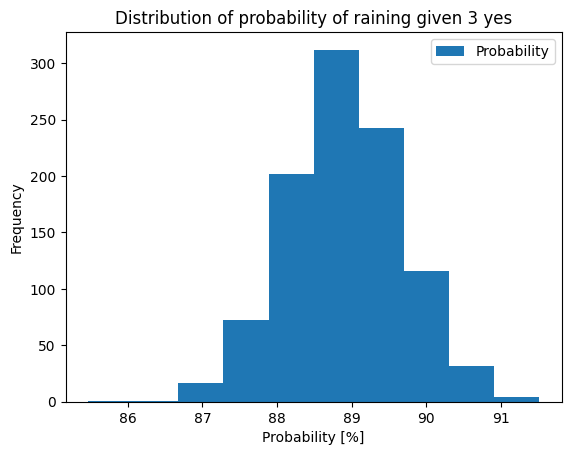

In [15]:
probabilityArray = numeratorArray / denominatorArray

probabilitiesDF = pd.DataFrame(probabilityArray * 100, columns = ["Probability"])

ax = probabilitiesDF.plot(kind = "hist", title = "Distribution of probability of raining given 3 yes")
ax.set_xlabel("Probability [%]")


In [17]:
probabilitiesDF.describe()

,Probability
count,1000.000000
mean,88.897439
std,0.770351
min,85.470625
25%,88.389796
50%,88.882265
75%,89.395043
max,91.508858


As we can see, the montecarlo simulation give us round 88.89% as mean probability of rain given 3 yes, meanwhile the closed-form solution give us arround 88.9% of probability of rain given 3 yes.